In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

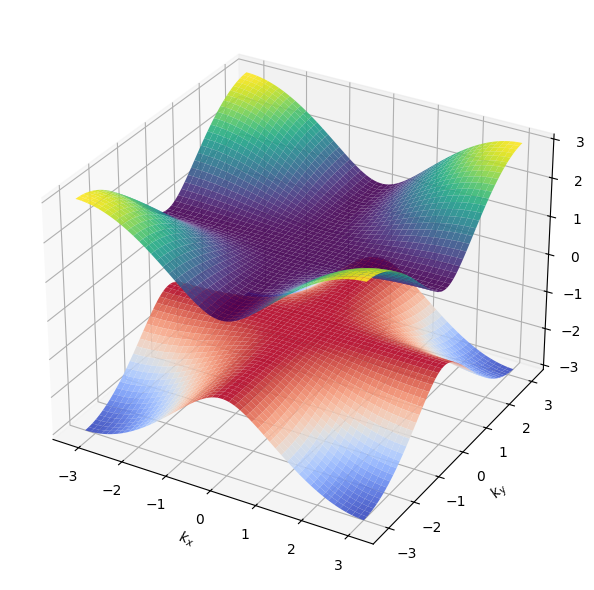

In [3]:
#Periodic-periodic
# Parameters
m = 1
Nk = 99
kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint = False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint = False)
KX, KY = np.meshgrid(kx_vals, ky_vals)



band1 = np.zeros((Nk, Nk))
band2 = np.zeros((Nk, Nk))

# Energy bands
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kx_vals[i], ky_vals[j]
        Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
        eigvals = np.linalg.eigvalsh(Hk)
        band1[j, i] = eigvals[0]
        band2[j, i] = eigvals[1]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, band1, cmap='coolwarm', edgecolor='none', alpha=0.9, label='Lower Band')
ax.plot_surface(KX, KY, band2, cmap='viridis', edgecolor='none', alpha=0.9, label='Upper Band')

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')
plt.tight_layout()
plt.show()


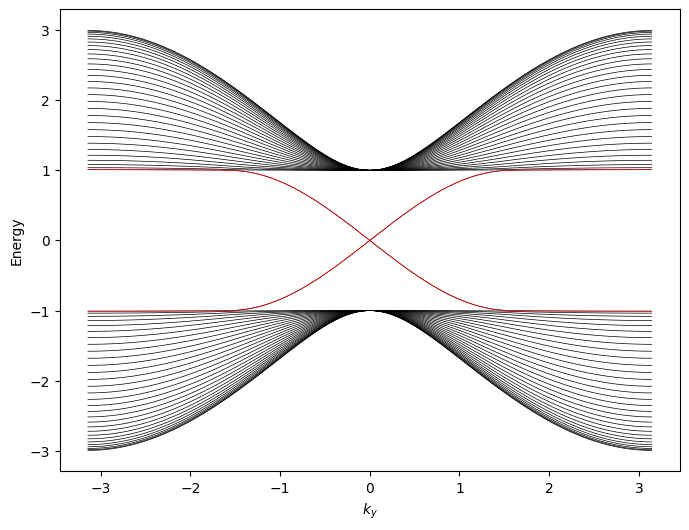

In [4]:
#Periodic-open
# Parameters
L = 30
kys =np.linspace(-np.pi, np.pi, 99)
m = 1

eigvals_oc_vs_ky = []

delta = -1
t = 0.5

#H1 = delta*np.sin(kx)*tau_x + delta*np.sin(ky)*tau_y + m -2*t*(np.cos(kx)+np.cos(ky))*tau_z

for ky in kys:
    H0 = np.sin(ky) * sigma_y + (m - np.cos(ky)) * sigma_z
    V = (-1j / 2) * sigma_x + (1 / 2) * sigma_z
    #H0 = delta*np.sin(ky)*tau_x + (m -2*t*(np.cos(ky)))*tau_z
    #V = delta*(-1j / 2) * tau_y + (m-2*t*(1 / 2)) * tau_z
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T


plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    plt.plot(kys, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.show()


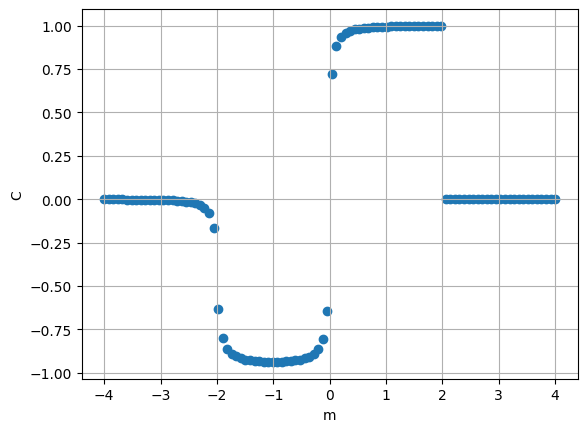

In [5]:
chern_n = []
Nk = 101
ms = np.linspace(-4, 4, 100)

kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)

for m in ms:
    # Compute eigenvectors on grid
    eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
    for i in range(Nk):
        for j in range(Nk):
            kx, ky = kx_vals[i], ky_vals[j]
            Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
            _, evecs = np.linalg.eigh(Hk)
            eigvecs[i, j, :] = evecs[:, 0]  # Lower band

    # Compute Berry curvature F for this m
    F = np.zeros((Nk - 1, Nk - 1))
    for i in range(Nk - 1):
        for j in range(Nk - 1):
            u = eigvecs[i, j]
            u_x = eigvecs[i + 1, j]
            u_y = eigvecs[i, j + 1]
            u_xy = eigvecs[i + 1, j + 1]

            Ux = np.vdot(u, u_x)
            Uy = np.vdot(u, u_y)
            Uxy = np.vdot(u_x, u_xy)
            Uyx = np.vdot(u_y, u_xy)

            # Normalize link variables to unit magnitude (pure phase)
            Ux /= np.abs(Ux)
            Uy /= np.abs(Uy)
            Uxy /= np.abs(Uxy)
            Uyx /= np.abs(Uyx)

            F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

    # Compute Chern number
    chern = np.sum(F) / (2 * np.pi)
    chern_n.append(chern)

plt.scatter (ms, chern_n)
plt.xlabel ('m')
plt.ylabel ('C')
plt.grid (True)
plt.show ()


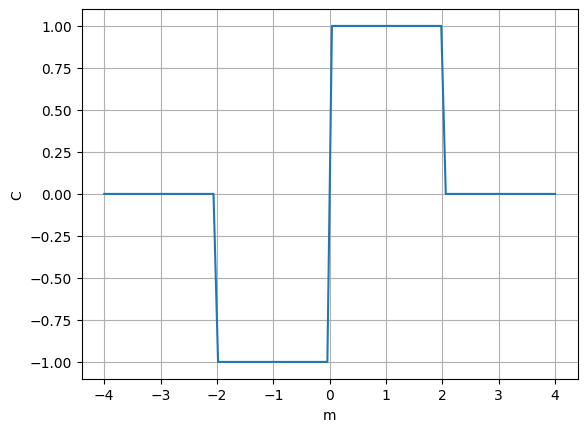

In [6]:
plt.plot (ms, np.round(np.array(chern_n)))
plt.xlabel ('m')
plt.ylabel ('C')
plt.grid (True)
plt.show ()

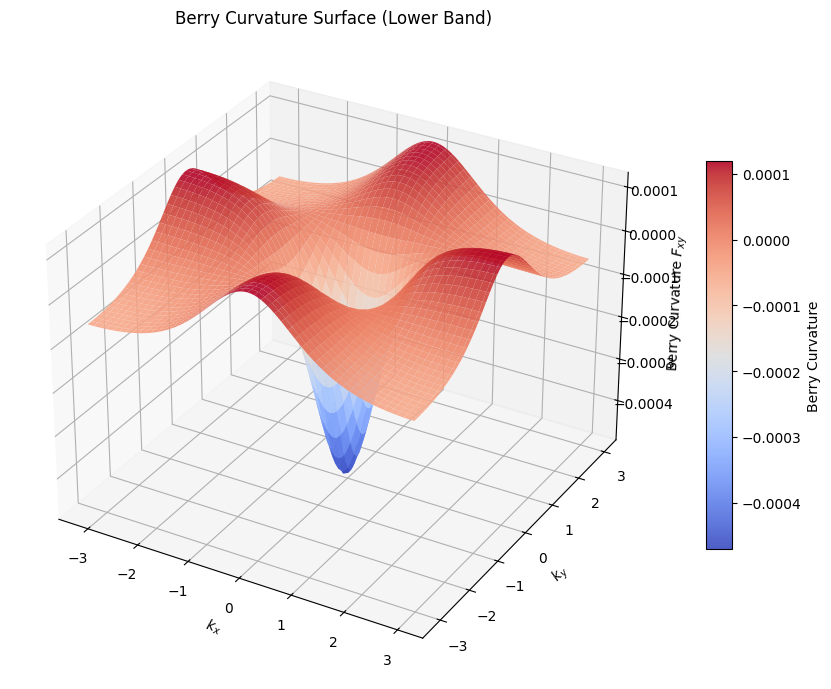

In [7]:
from matplotlib import cm

KX_plot, KY_plot = np.meshgrid(kx_vals[:-1], ky_vals[:-1])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(KX_plot, KY_plot, F.T, cmap='coolwarm', edgecolor='none', alpha=0.9)

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Berry Curvature $F_{xy}$')
ax.set_title('Berry Curvature Surface (Lower Band)')

fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, label='Berry Curvature')
plt.tight_layout()
plt.show()

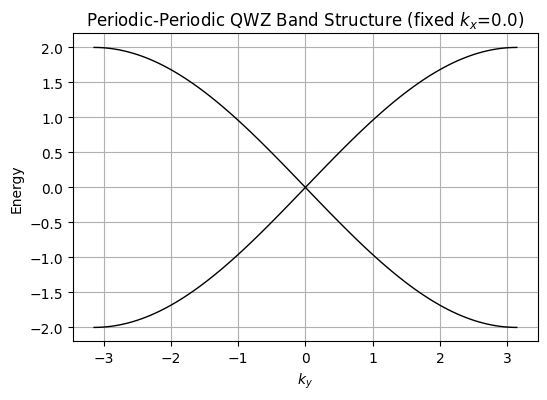

In [8]:
#periodic-periodic when k = 0 / 2D visualization for comparison purposes

# Parameters
m = 2
Nk = 99
kx = 0.0  # fixed kx
kys = np.linspace(-np.pi, np.pi, Nk)
bands = []

for ky in kys:
    Hk = np.sin(kx)*sigma_x + np.sin(ky)*sigma_y + (m - np.cos(kx) - np.cos(ky))*sigma_z
    eigvals = np.linalg.eigvalsh(Hk)
    bands.append(eigvals)

bands = np.array(bands).T

# Plot
plt.figure(figsize=(6,4))
for band in bands:
    plt.plot(kys, band, color='black', linewidth=1)
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.title(f'Periodic-Periodic QWZ Band Structure (fixed $k_x$={kx})')
plt.grid(True)
plt.show()


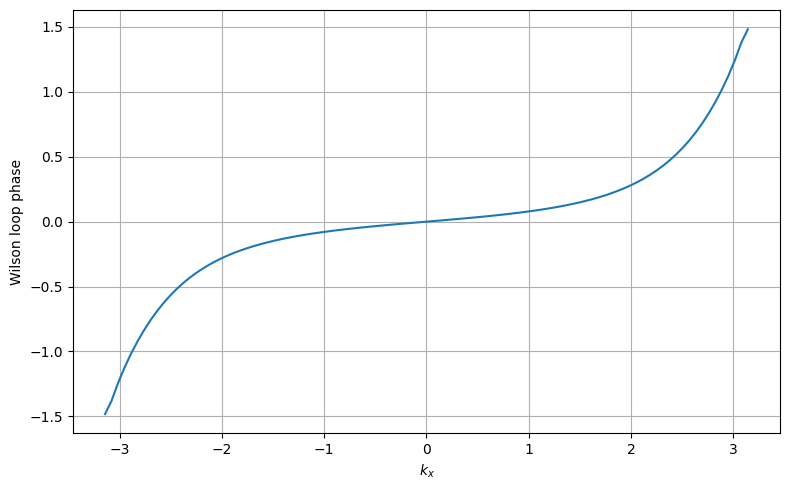

In [9]:
#Wilson loop

# Parameters
Nk = 100 
delta_k = 2 * np.pi / Nk
k_vals = np.linspace(0, 2*np.pi, Nk, endpoint=False)

# Chern insulator
def hamiltonian(kx, ky, M):
    sx = np.array([[0, 1], [1, 0]])
    sy = np.array([[0, -1j], [1j, 0]])
    sz = np.array([[1, 0], [0, -1]])
    I = np.eye(2)
    H = np.sin(kx) * sx + np.sin(ky) * sy + (M + np.cos(kx) + np.cos(ky)) * sz
    return H

# Wilson loop operator
def wilson_loop(kx_fixed, M):
    overlaps = []
    for i in range(Nk):
        ky1 = k_vals[i]
        ky2 = k_vals[(i+1) % Nk]
        H1 = hamiltonian(kx_fixed, ky1, M)
        H2 = hamiltonian(kx_fixed, ky2, M)
        _, v1 = np.linalg.eigh(H1)
        _, v2 = np.linalg.eigh(H2)
       
        
        u1 = v1[:, 0] #lwoest band only (0) because we're interested in the occ. band
        u2 = v2[:, 0]
        overlap = np.vdot(u1, u2)
        overlaps.append(overlap)
    
    W = np.prod(overlaps) 
    
    return np.angle(W)

# Wilson loop phases
kx_vals = np.linspace(-np.pi, np.pi, 100)
phases = [wilson_loop(kx,2) for kx in kx_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(kx_vals, np.unwrap(phases))
plt.xlabel("$k_x$")
plt.ylabel("Wilson loop phase")
plt.grid(True)
plt.tight_layout()
plt.show()
